# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 2000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](<https://doi.org/10.1016/s0140-6736(02)07746-2>), Lancet, 359(9306), 2002, pp. 572-577.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = "../ovariancancer_obs.csv"
ovariancancer_grp_path = "../ovariancancer_grp.csv"

A = np.genfromtxt(ovariancancer_obs_path, delimiter=",").transpose()
with open(ovariancancer_grp_path, "r") as fp:
    grp = np.array(fp.read().split("\n"))
grp = grp[grp != ""]

How many patients? How many features?


In [2]:
n_features = A.shape[0]
n_patients = A.shape[1]
print(f"{n_patients} patients")
print(f"{n_features} features")

216 patients
4000 features


How many patiens with and without cancer are there in the dataset?


In [3]:
print(f"{np.sum(grp == 'Cancer')} Cancer")
print(f"{np.sum(grp == 'Normal')} Normal")

121 Cancer
95 Normal


Choose two proteins (between 1 and 2000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?


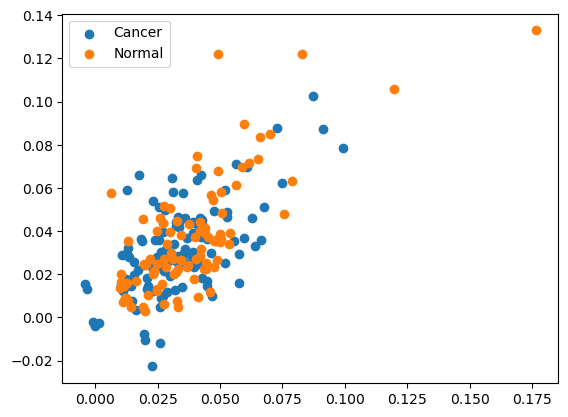

In [4]:
protein_x = 0
protein_y = 1

plt.scatter(
    A[protein_x, grp == "Cancer"], A[protein_y, grp == "Cancer"], label="Cancer"
)
plt.scatter(
    A[protein_x, grp == "Normal"], A[protein_y, grp == "Normal"], label="Normal"
)
plt.legend()
plt.show()

Repeat the previous point, this time by considering three proteins.


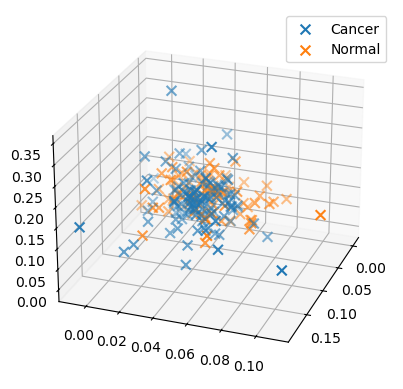

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

protein_x = 1000
protein_y = 2000
protein_z = 3000

for label in ("Cancer", "Normal"):
    ax.scatter(
        A[protein_x, grp == label],
        A[protein_y, grp == label],
        A[protein_z, grp == label],
        label=label,
        marker="x",
        s=50,
    )
plt.legend()
ax.view_init(25, 20)

## Principal Components Analysis


Perform PCA on the data. Then, plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


Text(0.5, 1.0, 'Explained variance')

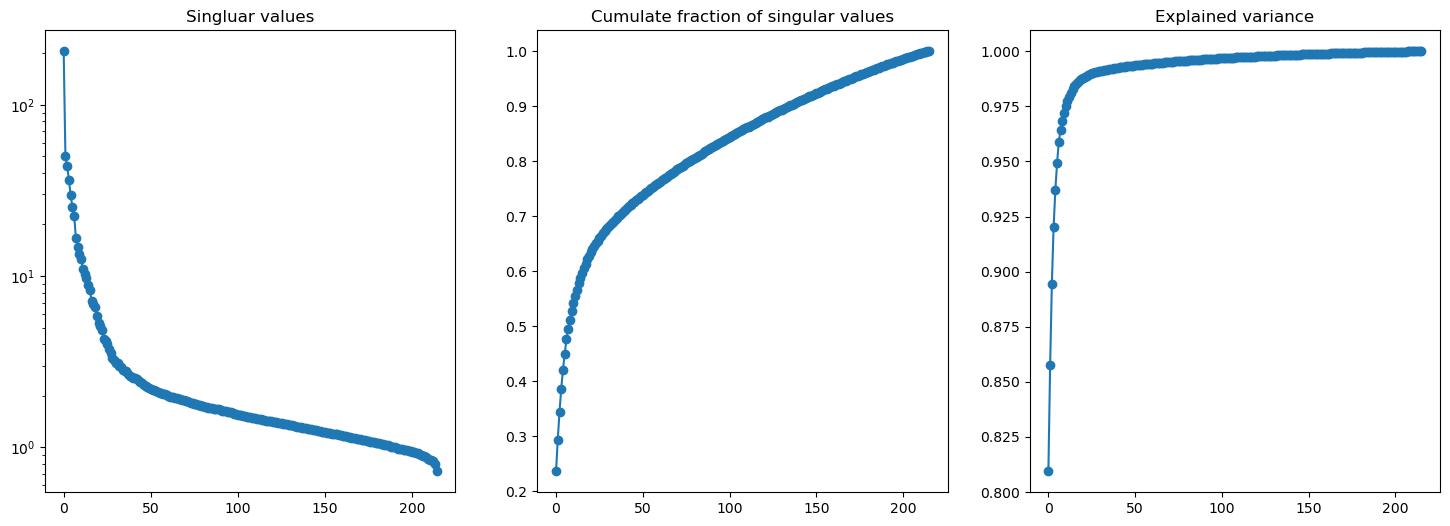

In [6]:
A_mean = A.mean(axis=1)
A_bar = A - A_mean[:, None]
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].semilogy(s[:-1], "o-")
axes[0].set_title("Singluar values")

axes[1].plot(np.cumsum(s) / np.sum(s), "o-")
axes[1].set_title("Cumulate fraction of singular values")

axes[2].plot(np.cumsum(s**2) / np.sum(s**2), "o-")
axes[2].set_title("Explained variance")

Make a scatterplot of the first two principal components of the patients.


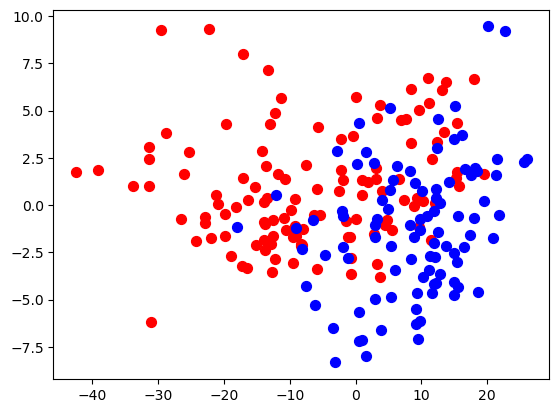

In [7]:
for i in range(n_patients):
    x = np.inner(A_bar[:, i], U[:, 0])
    y = np.inner(A_bar[:, i], U[:, 1])
    if grp[i] == "Cancer":
        col = "r"
    else:
        col = "b"
    plt.scatter(x, y, marker="o", color=col, s=50)

plt.show()

Make a scatterplot of the first three principal components of the patients.


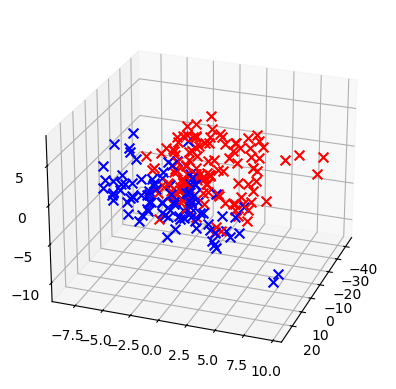

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for i in range(n_patients):
    x = np.inner(A_bar[:, i], U[:, 0])
    y = np.inner(A_bar[:, i], U[:, 1])
    z = np.inner(A_bar[:, i], U[:, 2])

    if grp[i] == "Cancer":
        col = "r"
    else:
        col = "b"
    ax.scatter(x, y, z, marker="x", color=col, s=50)

ax.view_init(25, 20)
plt.show()

Or more compactly, and with an interactive plot


In [10]:
import plotly.express as px

Phi_123 = U[:, 0:3].T @ A_bar[:, :n_patients]

px.scatter_3d(x=Phi_123[0, :], y=Phi_123[1, :], z=Phi_123[2, :], color=grp[:n_patients])

ValueError: All arguments should have the same length. The length of argument `color` is 216, whereas the length of  previously-processed arguments ['x', 'y', 'z'] is 3